In [40]:
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.cloud import storage
from datetime import datetime

from metpy.calc import azimuth_range_to_lat_lon
from metpy.cbook import get_test_data
from metpy.io import Level3File
from metpy.plots import add_metpy_logo, add_timestamp, colortables, USCOUNTIES
from metpy.units import units

# Load in BNW data table

In [41]:
file_path="C:/Users/rileybla/Desktop/CIE500_SP2025/Project/MASTER RIVERWATCH DATA_2014-2023_UB_2025-03.xlsx"

BNW=pd.read_excel(file_path, sheet_name="Master Riverkeeper Data (14-23)")
BNW.head()


,key,station_id_old,station_id_new,station_name,River,collection_date,Conductivity [p:2928],Dissolved Oxygen % [p:2925],Dissolved Oxygen (mg/L) [p:2924],E. coli [p:2927],...,owner_first_name,owner_last_name,certified,certifier_id,certifier_first_name,certifier_last_name,dataset_id,dataset_name,dataset_key,Buffalo_Y_N
0,NaN,BC04,BC01,Beaver Meadow Pond,Buffalo Creek,2017-05-20 10:01:00,100.3,84.0,8.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,BC04,BC01,Beaver Meadow Pond,Buffalo Creek,2017-06-17 10:54:23,163.6,140.8,11.34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,BC04,BC01,Beaver Meadow Pond,Buffalo Creek,2017-07-15 10:42:26,133.6,101.0,8.47,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,BC04,BC01,Beaver Meadow Pond,Buffalo Creek,2017-08-19 10:57:00,144.5,61.5,5.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,BC04,BC01,Beaver Meadow Pond,Buffalo Creek,2017-09-16 10:46:07,132.8,96.9,8.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# collect dates, locations, data measurements
 # Extract specific columns from the DataFrame
BNW_sub= BNW[["collection_date", "Conductivity [p:2928]","Dissolved Oxygen % [p:2925]","Dissolved Oxygen (mg/L) [p:2924]","E. coli [p:2927]","Temperature [p:2926]", "Total Dissolved Solids [p:2921]","Turbidity [p:2922]", "latitude","longitude"]]

# Show the result
BNW_sub.head()


,collection_date,Conductivity [p:2928],Dissolved Oxygen % [p:2925],Dissolved Oxygen (mg/L) [p:2924],E. coli [p:2927],Temperature [p:2926],Total Dissolved Solids [p:2921],Turbidity [p:2922],latitude,longitude
0,2017-05-20 10:01:00,100.3,84.0,8.14,NaN,16.9,77.4,3.69,42.672292,-78.38243
1,2017-06-17 10:54:23,163.6,140.8,11.34,NaN,26.4,103.3,1.71,42.672292,-78.38243
2,2017-07-15 10:42:26,133.6,101.0,8.47,NaN,24.2,88.4,8.49,42.672292,-78.38243
3,2017-08-19 10:57:00,144.5,61.5,5.20,NaN,23.7,96.2,3.04,42.672292,-78.38243
4,2017-09-16 10:46:07,132.8,96.9,8.74,NaN,20.4,94.9,2.64,42.672292,-78.38243


In [43]:
# Split collection_date into 3 sections
BNW_sub["collection_date"]

years = []
months = []
days = []
times = []

# Loop through the 'collection date' column
for date_str in BNW_sub['collection_date']:
    # Convert the string to a datetime object if needed
    #dt_object = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
    
    # Extract the year, month, day, and time components
    year = date_str.year
    month = f"{date_str.month:02d}"  # Format month to be two digits
    day = f"{date_str.day:02d}"      # Format day to be two digits
    time_str = date_str.strftime("%H%M%S")
    
    # Append the extracted values to the respective lists
    years.append(year)
    months.append(month)
    days.append(day)
    times.append(time_str)

# Add these as new columns in the DataFrame
BNW_sub['Year'] = years
BNW_sub['Month'] = months
BNW_sub['Day'] = days
BNW_sub['Time'] = times

# Show the updated DataFrame
BNW_sub

# Save the table to your folder
BNW_sub.to_excel('C:/Users/rileybla/Desktop/CIE500_SP2025/Project/BNW_sub_updated.xlsx', index=False)


C:\Users\rileybla\AppData\Local\Temp\ipykernel_16832\3714812987.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BNW_sub['Year'] = years
C:\Users\rileybla\AppData\Local\Temp\ipykernel_16832\3714812987.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BNW_sub['Month'] = months
C:\Users\rileybla\AppData\Local\Temp\ipykernel_16832\3714812987.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

# Download Data from Google repository

In [74]:
# Only Download data for the desired date/times
# Downloading data from:  https://console.cloud.google.com/storage/browser/gcp-public-data-nexrad-l3;tab=objects?invt=AbuECA&prefix=&forceOnObjectsSortingFiltering=false
# Simulated BNW_sub DataFrame (replace this with your actual DataFrame)
BNW_sub = pd.DataFrame({
    'collection_date': pd.to_datetime(['2024-07-01 12:00:00', '2025-01-02 13:30:00', '2025-04-01 15:45:00']),
    'Year': [2024, 2025, 2025],
    'Month': ['07', '01', '04'],
    'Day': ['01', '02', '01'],
    'Time': ['120000', '133000', '154500']
})

# Define the function to download public files
def download_public_file(bucket_name, source_blob_name, destination_file_name):
    """Downloads a public blob from the bucket."""
    storage_client = storage.Client.create_anonymous_client()

    # Get the bucket and blob
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)

    # Download the file to the specified destination
    blob.download_to_filename(destination_file_name)

    print(f"Downloaded public blob {source_blob_name} from bucket {bucket_name} to {destination_file_name}.")

# Parameters for downloading
bucket_name = "gcp-public-data-nexrad-l3"

# Create an empty list to store the file names
file_names = []

# Loop through each row in BNW_sub to construct and download files
for _, row in BNW_sub.iterrows():
    year = row['Year']
    month = row['Month']
    day = row['Day']
    time= row['Time']
    
    # Construct source_blob_name dynamically based on table data
    source_blob_name = f"{year}/{month}/{day}/KBUF/NWS_NEXRAD_NXL3_KBUF_{year}{month}{day}000000_{year}{month}{day}235959.tar.gz"
    
    # Construct destination file name dynamically #keep list of all filenames
    destination_file_name = f"KBUF_{year}{month}{day}.tar.gz"

    # Call the download function
    download_public_file(bucket_name, source_blob_name, destination_file_name)

     # Append the file name to the list
    file_names.append(destination_file_name)

# Add the file names as a new column to the BNW_sub DataFrame
BNW_sub['file_name'] = file_names

print(BNW_sub)


Downloaded public blob 2024/07/01/KBUF/NWS_NEXRAD_NXL3_KBUF_20240701000000_20240701235959.tar.gz from bucket gcp-public-data-nexrad-l3 to KBUF_20240701.tar.gz.
Downloaded public blob 2025/01/02/KBUF/NWS_NEXRAD_NXL3_KBUF_20250102000000_20250102235959.tar.gz from bucket gcp-public-data-nexrad-l3 to KBUF_20250102.tar.gz.
Downloaded public blob 2025/04/01/KBUF/NWS_NEXRAD_NXL3_KBUF_20250401000000_20250401235959.tar.gz from bucket gcp-public-data-nexrad-l3 to KBUF_20250401.tar.gz.
      collection_date  Year Month Day    Time             file_name
0 2024-07-01 12:00:00  2024    07  01  120000  KBUF_20240701.tar.gz
1 2025-01-02 13:30:00  2025    01  02  133000  KBUF_20250102.tar.gz
2 2025-04-01 15:45:00  2025    04  01  154500  KBUF_20250401.tar.gz


In [ ]:
# unzip the tar.dz files
import tarfile
import os

# Directory to store extracted files
extraction_dir = 'extracted_files'
os.makedirs(extraction_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Loop through each downloaded .tar.gz file in BNW_sub
for file_name in BNW_sub['file_name']:
    print(f"Processing file: {file_name}")
    with tarfile.open(file_name, 'r:gz') as tar:
        # Loop through each file in the archive
        for member in tar.getmembers():
            # Check if the file name contains 'N1P'
            if any(pattern in member.name for pattern in ['N1P', 'NTP', 'DAA']):    #Looks like only DAA exists for the test files
                print(f"Extracting: {member.name}")
                tar.extract(member, path=extraction_dir)

Processing file: KBUF_20240701.tar.gz
Extracting: KBUF_SDUS81_DAABUF_202407010253
Extracting: KBUF_SDUS81_DAABUF_202407010227
Extracting: KBUF_SDUS81_DAABUF_202407010236
Extracting: KBUF_SDUS81_DAABUF_202407010400
Extracting: KBUF_SDUS81_DAABUF_202407010041
Extracting: KBUF_SDUS81_DAABUF_202407010114
Extracting: KBUF_SDUS81_DAABUF_202407010157
Extracting: KBUF_SDUS81_DAABUF_202407010417
Extracting: KBUF_SDUS81_DAABUF_202407010425
Extracting: KBUF_SDUS81_DAABUF_202407010451
Extracting: KBUF_SDUS81_DAABUF_202407010535
Extracting: KBUF_SDUS81_DAABUF_202407010600
Extracting: KBUF_SDUS81_DAABUF_202407010725
Extracting: KBUF_SDUS81_DAABUF_202407010834
Extracting: KBUF_SDUS81_DAABUF_202407010908
Extracting: KBUF_SDUS81_DAABUF_202407011010
Extracting: KBUF_SDUS81_DAABUF_202407011055
Extracting: KBUF_SDUS81_DAABUF_202407011138
Extracting: KBUF_SDUS81_DAABUF_202407011152
Extracting: KBUF_SDUS81_DAABUF_202407011208
Extracting: KBUF_SDUS81_DAABUF_202407011214
Extracting: KBUF_SDUS81_DAABUF_2024070

# How to download One file given a specified link

def download_public_file(bucket_name, source_blob_name, destination_file_name):
    """Downloads a public blob from the bucket."""
    # Create an anonymous client since the bucket is public
    storage_client = storage.Client.create_anonymous_client()

    # Get the bucket and blob
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)

    # Download the file to the specified destination
    blob.download_to_filename(destination_file_name)

    print(
        f"Downloaded public blob {source_blob_name} from bucket {bucket_name} to {destination_file_name}."
    )

# figure out how to loop/ batch download...maybe use based on the table BNW data
# Parameters for downloading
bucket_name = "gcp-public-data-nexrad-l3"
source_blob_name = "2010/07/05/KBUF/NWS_NEXRAD_NXL3_KBUF_20100705000000_20100705235959.tar.Z"  # Replace with actual filename
destination_file_name = "KBUF_20100705.tar.Z"  # Local path to save file

# Run the download function
download_public_file(bucket_name, source_blob_name, destination_file_name)


# NEXRAD Level 3 File

Use MetPy to read information from a NEXRAD Level 3 (NIDS product) file and plot


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


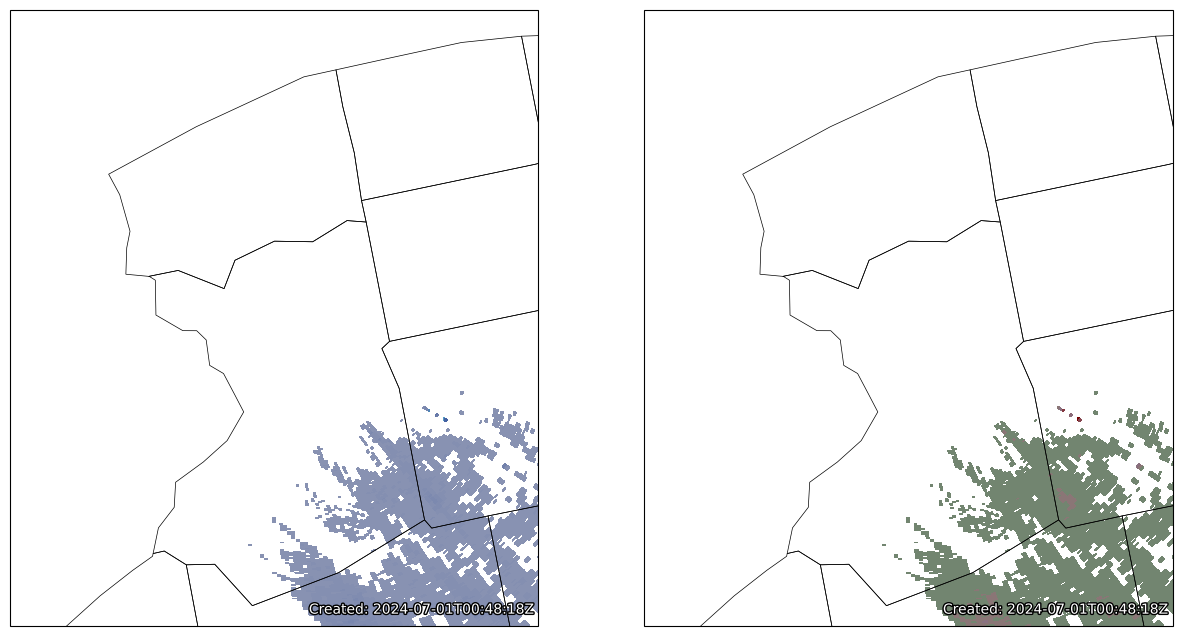

In [87]:
spec = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(15, 8))
#add_metpy_logo(fig, 190, 85, size='large')
ctables = (('NWSStormClearReflectivity', -20, 0.5),  # dBZ
           ('NWS8bitVel', -100, 1.0))  # m/s


for v, ctable, ax_rect in zip(('N0Q', 'N1P'), ctables, spec):  #N0Q, N0U #add destination_file_name to loop
    # Open the file
    #name = get_test_data(f'nids/KOUN_SDUS54_{v}TLX_201305202016', as_file_obj=False)
    name = "C:/Users/rileybla/Desktop/CIE500_SP2025/Project/extracted_files/KBUF_SDUS81_DAABUF_202407010041"  #needs to be for specific time e.g.KBUF_SDUS21_N1QBUF_201007050002
    f = Level3File(name)

    # Pull the data out of the file object
    datadict = f.sym_block[0][0]

    # Turn into an array using the scale specified by the file
    data = f.map_data(datadict['data'])

    # Grab azimuths and calculate a range based on number of gates,
    # both with their respective units
    az = units.Quantity(np.array(datadict['start_az'] + [datadict['end_az'][-1]]), 'degrees')
    rng = units.Quantity(np.linspace(0, f.max_range, data.shape[-1] + 1), 'kilometers')

    # Extract central latitude and longitude from the file
    cent_lon = f.lon
    cent_lat = f.lat

    # Convert az,range to x,y
    xlocs, ylocs = azimuth_range_to_lat_lon(az, rng, cent_lon, cent_lat)

    # Plot the data
    crs = ccrs.LambertConformal()
    ax = fig.add_subplot(ax_rect, projection=crs)
    ax.add_feature(USCOUNTIES, linewidth=0.5)
    norm, cmap = colortables.get_with_steps(*ctable)
    ax.pcolormesh(xlocs, ylocs, data, norm=norm, cmap=cmap, transform=ccrs.PlateCarree())
    ax.set_extent([cent_lon - 0.5, cent_lon + 0.5, cent_lat - 0.5, cent_lat + 0.5])
    ax.set_aspect('equal', 'datalim')
    add_timestamp(ax, f.metadata['prod_time'], y=0.02, high_contrast=True)

    # add legend of rain depth

plt.show()

somehow specify time of interest that is listed in the table and then pull out specific data connected to coordinates

In [69]:
from metpy.io import Level3File

# Specify the file path
filename = "C:/Users/rileybla/Desktop/KBUF_SDUS21_N1QBUF_201007050002"

# Open the file
f = Level3File(filename)

# Inspect the symbology block for available data
print(f"Number of symbology blocks: {len(f.sym_block)}")

# Loop through each symbology block and inspect its structure
for idx, block in enumerate(f.sym_block):
    print(f"\nSymbology Block {idx}:")
    print(block)  # This will show details about each block
    
# Inspect metadata for product details
print("Product Description:", f.prod_desc)
print("Product Code:", f.prod_desc['code'])
print("Product Name:", f.product_name)

# Check for additional blocks like Graphic and Tabular Alphanumeric blocks
if hasattr(f, 'graphic_block'):
    print("Graphic Block Available")
if hasattr(f, 'tabular_block'):
    print("Tabular Block Available")

# Access metadata
print("Radar Site ID:", f.siteID)
print("Latitude:", f.lat)
print("Longitude:", f.lon)
print("Height (AMSL):", f.height)
print("Product Name:", f.product_name)
print("Maximum Range (km):", f.max_range)

# Access decoded product header and description
print("Header:", f.header)
print("Product Description:", f.prod_desc)


Number of symbology blocks: 1

Symbology Block 0:
[{'start_az': [29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0

TypeError: tuple indices must be integers or slices, not str

In [70]:
from metpy.io import Level3File

# Specify the file path
filename = "C:/Users/rileybla/Desktop/KBUF_SDUS21_N1QBUF_201007050002"

# Open the file
f = Level3File(filename)

# Check if sym_block is a list
if isinstance(f.sym_block, list):
    print("sym_block is a list")
    # Iterate through each item in the list
    for i, item in enumerate(f.sym_block):
        print(f"Item {i}:")
        # Check if the item is a list itself
        if isinstance(item, list):
            for j, sub_item in enumerate(item):
                print(f"  Sub-item {j}:")
                # Check if the sub-item is a dictionary
                if isinstance(sub_item, dict):
                    print("    Keys:", sub_item.keys())
                    # Access specific keys if needed
                    if 'data' in sub_item:
                        print("    Data:", sub_item['data'])
                    if 'start_az' in sub_item:
                        print("    Start Azimuth:", sub_item['start_az'])
                    if 'end_az' in sub_item:
                        print("    End Azimuth:", sub_item['end_az'])
                else:
                    print("    Not a dictionary:", type(sub_item))
        else:
            print("  Not a list:", type(item))
else:
    print("sym_block is not a list:", type(f.sym_block))


sym_block is a list
Item 0:
  Sub-item 0:
    Keys: dict_keys(['start_az', 'end_az', 'data', 'center', 'gate_scale', 'first'])
    Data: [bytearray(b'\x00\x00-3.;:50/.)("$$\'\'$(/*.,)(-,0223688632,,+(\'&)&+***0-,//---//0,/0.-11/012/,/-/,++).+++()+,()+,,((++*\'+(\x00*\')+\'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0